# KNN Algoritması Tutroial
.import dataset
.datasetimin tanımı
.dataset göreselleştirme
.knn lgoritması ne demek açıkla
.knn with sklearn
.ödev

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [56]:
data =pd.read_csv("data.csv")

In [57]:
data.tail()
#M malignant (kötü huylu tümor)
#b benign  (iyi huylu tümör)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [58]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

In [59]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
M =data[data.diagnosis =="M"]
B =data[data.diagnosis =="B"]

In [61]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                212 non-null    object 
 1   radius_mean              212 non-null    float64
 2   texture_mean             212 non-null    float64
 3   perimeter_mean           212 non-null    float64
 4   area_mean                212 non-null    float64
 5   smoothness_mean          212 non-null    float64
 6   compactness_mean         212 non-null    float64
 7   concavity_mean           212 non-null    float64
 8   concave points_mean      212 non-null    float64
 9   symmetry_mean            212 non-null    float64
 10  fractal_dimension_mean   212 non-null    float64
 11  radius_se                212 non-null    float64
 12  texture_se               212 non-null    float64
 13  perimeter_se             212 non-null    float64
 14  area_se                  2

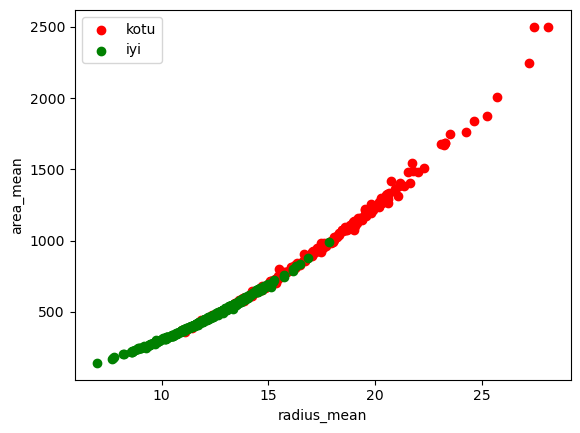

In [62]:
#scatter ploy
#iki featur arasındaki corelaltiona bakmak için scatter kullanılır
plt.scatter(M.radius_mean,M.area_mean,color="red",label="kotu")
plt.scatter(B.radius_mean,B.area_mean,color="green",label="iyi")
plt.xlabel("radius_mean")
plt.ylabel("area_mean")
plt.legend() #labellerımı göstermeme yarıyor
plt.show()

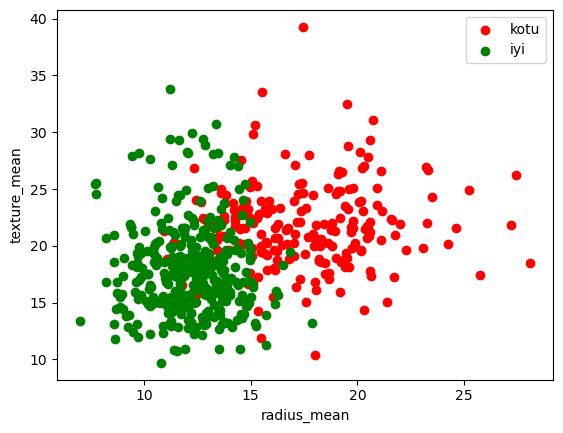

In [63]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu")
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend() #labellerımı göstermeme yarıyor
plt.show()

In [64]:
data.diagnosis =[1 if each=="M" else 0 for each in data.diagnosis]
y=data.diagnosis.values
x=data.drop(["diagnosis"],axis=1)
#x_data=data.iloc[:1:3].values

In [66]:
#normalization
x=(x_Data -np.min(x_data))/(np.max(x_data)-np.min(x_data))

NameError: name 'x_Data' is not defined

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)#n_neghbours=k
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [ ]:
prediction